In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\rohit\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Preparing the Dataset

In [52]:
dataframe=pd.read_csv("winequality-red.csv")

In [53]:
dataframe["total sulfur dioxide"]

0       34.0
1       67.0
2       54.0
3       60.0
4       34.0
        ... 
1594    44.0
1595    51.0
1596    40.0
1597    44.0
1598    42.0
Name: total sulfur dioxide, Length: 1599, dtype: float64

### Normalizing the "total sulfur dioxide" column

In [54]:
dataframe["total sulfur dioxide"]=(dataframe["total sulfur dioxide"]-dataframe["total sulfur dioxide"].min())/(dataframe["total sulfur dioxide"].max()-dataframe["total sulfur dioxide"].min())

In [55]:
dataframe

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,0.098940,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,0.215548,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,0.169611,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,0.190813,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,0.098940,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,0.134276,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,0.159011,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,0.120141,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,0.134276,0.99547,3.57,0.71,10.2,5


In [56]:
X=dataframe.drop(["quality"], axis=1)
Y=dataframe["quality"]

In [57]:
print (dataframe['total sulfur dioxide'].min())
print (dataframe['total sulfur dioxide'].max())

0.0
1.0


## We are going to use two models over here:
### -> Tf gradient tape technique model
### -> Traditional Tensorflow model

## This is Tf gradient tape utilized model

## 1.a) Defing the Gradient tape model

In [58]:
def train_model (model, optimizer, m_loss, x, y, accuracy):
    with tf.GradientTape() as tape:
        prediction=model(x)
        loss=m_loss(y, prediction)
    gradients=tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    accuracy.update_state (y, prediction)
    return loss

In [59]:
def train_each_step (model, optimizers, train_ds, main_loss, accuracy, epochs):
    epoch_list=[]
    loss_list=[]
    loss=0
    for epoch in range (epochs):
        for (x, y) in train_ds:
            epoch+=1
            loss=train_model(model,
                            optimizers,
                            main_loss,
                            x,
                            y,
                            accuracy)
            tf.print("epoch: ", epoch + 1, "loss: ", loss, "accuracy: ", accuracy.result())
            loss_list.append(loss)
            epoch_list.append(epoch)
            if (epoch==epochs):
                break
    print(accuracy.result(), loss)

## 1.d) Converting the dataset into the first dimension of the dataset

In [62]:
train_dataset=tf.data.Dataset.from_tensor_slices((X, Y))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size=32)

## 1.c) Defining the model

In [61]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense (1, )
])
optimizer = tf.keras.optimizers.Adam()
losses = tf.keras.losses.mae
accuracy = tf.keras.metrics.CategoricalAccuracy()
train_each_step(model, optimizer, train_dataset, losses, accuracy, 70)

epoch:  2 loss:  [5.14072227 5.71677732 5.23108578 ... 4.83557558 5.10276318 4.75527811] accuracy:  0
epoch:  3 loss:  [3.93676281 3.66886139 4.34315205 ... 3.26628113 3.97853327 3.9211936] accuracy:  0.5
epoch:  4 loss:  [3.92516232 4.10031462 4.52121067 ... 3.52882385 3.27212334 3.46489286] accuracy:  0.333333343
epoch:  5 loss:  [1.23556244 1.5102632 2.95205116 ... 4.03627586 2.47817564 1.90203738] accuracy:  0.25
epoch:  6 loss:  [3.78646898 2.99348164 1.11493146 ... 0.807430506 1.56154788 4.19817638] accuracy:  0.2
epoch:  7 loss:  [2.67126107 0.909729958 1.69575405 ... 1.30835962 2.72912359 1.74755049] accuracy:  0.166666672
epoch:  8 loss:  [0.567494869 1.94980907 1.70652628 ... 1.93506348 2.24333382 1.58767509] accuracy:  0.142857149
epoch:  9 loss:  [1.64920187 1.86528826 0.806540251 ... 2.51907825 2.05726719 1.76373267] accuracy:  0.125
epoch:  10 loss:  [1.54486895 0.630446315 0.631551743 ... 1.18283474 0.836717784 2.29149199] accuracy:  0.111111112
epoch:  11 loss:  [0.5278

epoch:  26 loss:  [0.611271143 0.651156 0.643379092 ... 0.643253803 0.623690248 0.67214489] accuracy:  0.0135135138
epoch:  27 loss:  [0.814300299 0.743965268 0.889504731 ... 0.724340439 0.745435476 0.806110382] accuracy:  0.0133333337
epoch:  28 loss:  [0.691958368 0.718245268 0.700411558 ... 0.816112518 0.700401127 0.691443682] accuracy:  0.0131578948
epoch:  29 loss:  [0.558908284 0.506443501 0.785022259 ... 0.557220757 0.521643877 0.555015862] accuracy:  0.012987013
epoch:  30 loss:  [0.66991806 0.577465594 0.562623262 ... 0.60937649 0.53230989 0.685301304] accuracy:  0.012820513
epoch:  31 loss:  [0.731086969 0.911776543 0.726287484 ... 0.723020315 0.748642683 0.854304373] accuracy:  0.0126582282
epoch:  32 loss:  [0.590929747 0.605845213 0.606345415 ... 0.691240191 0.539995551 0.503578663] accuracy:  0.0125
epoch:  33 loss:  [1.76368427 0.738087773 0.751379728 ... 0.779371083 0.762703538 0.818863213] accuracy:  0.0123456791
epoch:  34 loss:  [0.959409416 0.600830495 0.71852082 ..

epoch:  48 loss:  [0.792310357 0.664173484 0.740345716 ... 0.73057431 0.774965048 0.610634685] accuracy:  0.0551724136
epoch:  49 loss:  [0.676906586 0.575351834 0.573505878 ... 0.604154706 0.624277353 0.644752264] accuracy:  0.0547945201
epoch:  50 loss:  [0.743776679 0.752753258 0.810954928 ... 0.751038194 0.729913414 0.744612217] accuracy:  0.0544217676
epoch:  51 loss:  [1.23862708 0.74103713 0.706151307 ... 0.6441589 0.600796521 0.720102072] accuracy:  0.0540540554
epoch:  52 loss:  [0.730690539 0.701041698 0.826066375 ... 0.970812082 0.776206 1.03855932] accuracy:  0.0536912754
epoch:  53 loss:  [0.992707968 0.836184084 0.956281722 ... 0.823443532 0.82494 0.943956554] accuracy:  0.06
epoch:  5 loss:  [0.783701658 0.941288471 0.643707633 ... 0.575492382 0.633698 0.615037084] accuracy:  0.0662251636
epoch:  6 loss:  [1.11432636 0.732417226 0.687606335 ... 0.775724292 0.629561901 0.685491085] accuracy:  0.065789476
epoch:  7 loss:  [0.723003268 0.762620628 0.728352427 ... 0.84707939

epoch:  22 loss:  [0.652803421 0.769328237 0.610310555 ... 0.666799307 0.703821898 0.707954168] accuracy:  0.059907835
epoch:  23 loss:  [0.586209059 0.58155179 0.582751393 ... 0.656036377 0.734229088 0.577403069] accuracy:  0.0596330278
epoch:  24 loss:  [0.741971493 0.560795307 0.801234066 ... 0.485288143 0.496272206 0.655890465] accuracy:  0.0593607314
epoch:  25 loss:  [1.00203395 0.769410849 0.746605575 ... 0.866768062 0.922352552 1.12428939] accuracy:  0.0590909086
epoch:  26 loss:  [0.65625 0.65625 0.65625 ... 0.65625 0.951500416 0.751802087] accuracy:  0.0588235296
epoch:  27 loss:  [0.75508368 0.740723968 0.741384149 ... 0.730771303 0.67937088 0.73458612] accuracy:  0.0585585572
epoch:  28 loss:  [0.929615319 0.852862 0.778569 ... 0.84876287 0.796015143 0.828868508] accuracy:  0.0582959652
epoch:  29 loss:  [0.743773222 0.65625 0.65625 ... 0.65625 0.702143192 0.65625] accuracy:  0.0580357127
epoch:  30 loss:  [0.849711776 0.853208423 1.00253332 ... 0.854484916 0.952025175 0.72

epoch:  45 loss:  [0.78125 0.78125 0.78125 ... 0.78125 0.78125 0.78125] accuracy:  0.0657439455
epoch:  46 loss:  [0.737502098 0.705348909 0.671922624 ... 0.65643543 0.769418299 0.862122595] accuracy:  0.0655172393
epoch:  47 loss:  [0.635305882 0.828409195 0.7955212 ... 0.78524226 0.857353628 0.845342875] accuracy:  0.0652921
epoch:  48 loss:  [0.883178 0.955637574 0.888288 ... 0.867306828 0.891094446 0.872745156] accuracy:  0.0684931502
epoch:  49 loss:  [0.801480234 0.805807412 0.780976772 ... 0.786477 0.790875 0.807207346] accuracy:  0.0682593882
epoch:  50 loss:  [0.513375282 0.448724747 1.08798885 ... 0.621538162 0.785409927 0.647335768] accuracy:  0.0680272132
epoch:  51 loss:  [0.71875 0.71875 0.71875 ... 0.71875 0.71875 0.71875] accuracy:  0.0677966103
epoch:  52 loss:  [0.706382573 0.684892893 0.67557174 ... 0.687547445 0.685367763 0.702366352] accuracy:  0.0675675645
epoch:  53 loss:  [0.599981844 0.60015893 0.581652164 ... 0.624684215 0.694105148 0.568676949] accuracy:  0.0

epoch:  19 loss:  [0.579704404 0.586776376 0.637245417 ... 0.612550855 0.537625909 0.533526063] accuracy:  0.0637119114
epoch:  20 loss:  [0.686167657 0.549927 0.564792752 ... 0.644325 0.591740847 0.704927742] accuracy:  0.0635359138
epoch:  21 loss:  [0.727828622 0.771628 0.683158755 ... 0.611504197 0.638358474 0.669545293] accuracy:  0.0661157
epoch:  22 loss:  [0.688443601 1.18418217 0.749298632 ... 0.769398034 0.922894955 1.0462544] accuracy:  0.0659340695
epoch:  23 loss:  [0.813706398 0.688214362 0.666276455 ... 1.04257715 0.773051262 0.960271597] accuracy:  0.0657534227
epoch:  24 loss:  [0.814825892 0.824676752 0.885191321 ... 0.99527663 0.840742588 0.813664794] accuracy:  0.0655737668
epoch:  25 loss:  [0.679101 0.635830164 0.657394052 ... 0.654799521 0.850076616 0.768670678] accuracy:  0.0653950945
epoch:  26 loss:  [0.65625 0.799506426 0.65625 ... 0.65625 0.65625 0.65625] accuracy:  0.0652173907
epoch:  27 loss:  [0.725871921 0.722851276 0.714963615 ... 0.71665597 0.71543860

epoch:  42 loss:  [0.900162101 0.851492763 0.880356193 ... 0.873745084 0.725294113 0.913954496] accuracy:  0.0692840666
epoch:  43 loss:  [0.677523255 0.709047675 0.601730824 ... 0.733561754 0.714110851 0.740981579] accuracy:  0.069124423
epoch:  44 loss:  [0.751469254 0.74822104 0.74941361 ... 0.751872301 0.756763399 0.736278951] accuracy:  0.068965517
epoch:  45 loss:  [0.688518643 0.736804724 0.768199325 ... 0.864111066 0.697774291 0.749219775] accuracy:  0.0688073412
epoch:  46 loss:  [0.859833 0.817531765 0.858569324 ... 0.889804363 0.84884429 0.794932783] accuracy:  0.068649888
epoch:  47 loss:  [0.625 0.625 0.625 ... 0.625 0.625 0.625] accuracy:  0.0684931502
epoch:  48 loss:  [0.752095401 0.722665548 0.880794764 ... 0.723129869 0.752581179 0.733275592] accuracy:  0.0683371276
epoch:  49 loss:  [0.539393902 0.765638351 0.713689327 ... 0.698969543 0.662322044 0.620517492] accuracy:  0.0704545453
epoch:  50 loss:  [0.725410223 0.78566134 0.680816293 ... 1.13303876 0.775435925 0.75

epoch:  16 loss:  [0.799458385 0.507545352 0.511694372 ... 0.446016908 0.613293231 0.81861639] accuracy:  0.0831683204
epoch:  17 loss:  [0.658839762 0.609648108 0.628274858 ... 0.606723666 0.691244483 0.698570728] accuracy:  0.0830039531
epoch:  18 loss:  [0.875 0.875 0.875 ... 0.875 0.875 0.875] accuracy:  0.082840234
epoch:  19 loss:  [0.801835179 0.642422557 0.684167087 ... 0.74194169 0.783092499 0.821492493] accuracy:  0.0826771632
epoch:  20 loss:  [0.862633169 0.843844354 0.817917049 ... 0.854745 0.823820233 0.820569] accuracy:  0.0825147331
epoch:  21 loss:  [0.729500353 0.719066381 0.865898609 ... 0.673540235 0.780193329 0.798571408] accuracy:  0.0843137279
epoch:  22 loss:  [0.681184173 0.88635242 0.694423199 ... 0.620987415 0.694477677 0.624263644] accuracy:  0.0841487274
epoch:  23 loss:  [0.727459192 0.739627957 0.958893538 ... 0.84405 0.731812358 0.725844443] accuracy:  0.083984375
epoch:  24 loss:  [0.819898367 0.683199525 0.714300275 ... 0.627647161 0.76025 0.684935451]

epoch:  39 loss:  [0.600780666 0.584834874 0.615968108 ... 0.629747808 0.582395613 0.601093054] accuracy:  0.0918544158
epoch:  40 loss:  [0.560918272 0.621434569 0.545847654 ... 0.49748 0.769260347 0.452234358] accuracy:  0.0916955
epoch:  41 loss:  [0.682045639 0.636351287 0.6568681 ... 0.594682634 0.608558 0.618599534] accuracy:  0.0915371329
epoch:  42 loss:  [0.625 0.625 0.625 ... 0.625 0.625 0.625] accuracy:  0.0913793072
epoch:  43 loss:  [0.749302328 0.669847548 0.730572939 ... 0.823626161 0.675140142 0.783640146] accuracy:  0.0912220329
epoch:  44 loss:  [0.75 0.75 0.75 ... 0.75 0.75 0.75] accuracy:  0.091065295
epoch:  45 loss:  [0.685174704 0.702956438 0.702748775 ... 0.680725217 0.683386862 0.678459108] accuracy:  0.0926243588
epoch:  46 loss:  [0.800982475 0.70526135 0.778282404 ... 0.691661596 0.791696608 0.732380509] accuracy:  0.0924657509
epoch:  47 loss:  [0.75 0.75 0.75 ... 0.75 0.75 0.75] accuracy:  0.0923076943
epoch:  48 loss:  [0.789175391 0.80505085 0.876487851 

epoch:  63 loss:  [0.869781256 0.886498034 0.818398893 ... 0.907553375 0.921466172 0.912279606] accuracy:  0.0923076943
epoch:  15 loss:  [0.68927 0.69253993 0.724207878 ... 0.720123887 0.644461036 0.807041526] accuracy:  0.0921659
epoch:  16 loss:  [0.877203 0.977802277 0.851875424 ... 0.84769392 1.02160847 0.840367079] accuracy:  0.0920245424
epoch:  17 loss:  [0.78586328 0.77859 0.77023983 ... 0.947243452 0.795932293 0.781532645] accuracy:  0.093415007
epoch:  18 loss:  [0.78125 0.78125 1.04730785 ... 0.78125 0.78125 1.17798662] accuracy:  0.0932721719
epoch:  19 loss:  [0.684345841 0.985328078 0.719438136 ... 0.690180182 0.709911942 0.832318723] accuracy:  0.093129769
epoch:  20 loss:  [0.960834861 0.619292 0.895311177 ... 0.609629095 0.692987084 0.610412478] accuracy:  0.0929878056
epoch:  21 loss:  [0.682888269 0.74039489 0.656414509 ... 0.66081214 0.725903392 0.710200071] accuracy:  0.0928462744
epoch:  22 loss:  [0.737373233 0.775500059 0.709474564 ... 0.78170383 0.83596611 0.7

epoch:  36 loss:  [0.5 0.5 0.5 ... 0.5 0.5 0.5] accuracy:  0.0943134502
epoch:  37 loss:  [0.534322381 0.550511599 0.571685314 ... 0.551805496 0.556277037 0.563517094] accuracy:  0.0941828266
epoch:  38 loss:  [0.714442611 0.806013584 0.901993573 ... 0.710091114 0.810181856 0.627241] accuracy:  0.0940525606
epoch:  39 loss:  [0.732607841 0.757997811 0.67753166 ... 0.72444731 0.667243898 0.706962109] accuracy:  0.0939226523
epoch:  40 loss:  [0.755941868 0.941238105 0.8178792 ... 0.695532143 0.721943796 0.707934737] accuracy:  0.0937931
epoch:  41 loss:  [0.765013337 0.641052961 0.703526735 ... 0.752398372 0.734864473 0.670435071] accuracy:  0.0936639085
epoch:  42 loss:  [0.6875 0.6875 0.6875 ... 0.6875 0.6875 0.6875] accuracy:  0.0935350731
epoch:  43 loss:  [0.619505882 0.615077376 0.607931495 ... 0.639287829 0.642971694 0.635073245] accuracy:  0.0934065953
epoch:  44 loss:  [0.718715191 0.697231174 0.689780235 ... 0.710050404 0.720980644 0.6902529] accuracy:  0.0932784602
epoch:  45

epoch:  61 loss:  [0.739675403 0.938153744 0.699955225 ... 0.937303543 0.858983517 0.759198546] accuracy:  0.094339624
epoch:  62 loss:  [0.841231406 0.99798727 0.795616 ... 0.759570658 0.661876082 0.831002951] accuracy:  0.0942211077
epoch:  63 loss:  [0.960720778 1.17472124 0.798424959 ... 0.84610033 0.8839221 1.00962639] accuracy:  0.0953575894
epoch:  64 loss:  [0.752643049 0.681672 0.755499125 ... 0.694310844 0.660356343 0.705928087] accuracy:  0.0952381
epoch:  65 loss:  [0.674141407 0.615496695 0.67744875 ... 0.612896204 0.613137364 0.620382309] accuracy:  0.0951188952
epoch:  66 loss:  [0.640943587 0.62260443 0.637127221 ... 0.622431457 0.639527857 0.630577147] accuracy:  0.095
epoch:  18 loss:  [0.768756628 0.768154562 0.705359 ... 0.657700777 0.693167806 0.726963699] accuracy:  0.0948814
epoch:  19 loss:  [0.532953501 0.607430458 0.583601058 ... 0.556780636 0.610735 0.588184774] accuracy:  0.0947630927
epoch:  20 loss:  [0.690459192 0.770598233 0.715423942 ... 0.693657398 0.7

epoch:  35 loss:  [0.75 0.75 0.75 ... 0.75 0.75 0.75] accuracy:  0.0957324132
epoch:  36 loss:  [0.737936616 0.675882 0.607143283 ... 0.591807246 0.58663559 0.674485683] accuracy:  0.0956221223
epoch:  37 loss:  [0.678501129 0.77441293 0.758832574 ... 0.964506149 0.725087404 0.73723644] accuracy:  0.0955120847
epoch:  38 loss:  [0.564519167 0.627207816 0.563589334 ... 0.645825863 0.68486774 0.614911795] accuracy:  0.0954023
epoch:  39 loss:  [0.742586 0.779706419 0.753501654 ... 0.994680524 0.77978605 0.744690657] accuracy:  0.0952927694
epoch:  40 loss:  [0.6875 0.921743155 0.6875 ... 0.6875 0.813532114 0.6875] accuracy:  0.0951834843
epoch:  41 loss:  [0.647423565 0.649600923 0.671829581 ... 0.621188283 0.662323177 0.994873047] accuracy:  0.0950744525
epoch:  42 loss:  [0.59375 0.59375 0.59375 ... 0.59375 0.59375 0.59375] accuracy:  0.094965674
epoch:  43 loss:  [0.8125 0.8125 0.8125 ... 0.8125 0.8125 0.8125] accuracy:  0.0948571414
epoch:  44 loss:  [0.669786572 0.70615983 0.6805771

epoch:  59 loss:  [0.697954774 0.699802756 0.699559212 ... 0.701474547 0.771505952 1.02187586] accuracy:  0.0946808532
epoch:  60 loss:  [0.7869609 0.791017056 0.785728633 ... 0.809913397 0.804008961 0.972384095] accuracy:  0.0945802331
epoch:  61 loss:  [0.6875 0.6875 0.6875 ... 0.70613 0.6875 0.708962083] accuracy:  0.0944798291
epoch:  62 loss:  [0.732533693 0.733776927 0.735072851 ... 0.862762213 0.770649195 0.792325735] accuracy:  0.0943796411
epoch:  63 loss:  [0.822212458 0.728118539 0.699969411 ... 0.744849086 0.657892227 0.676181555] accuracy:  0.0942796618
epoch:  64 loss:  [0.610254347 0.629614055 0.582189441 ... 0.533526421 0.598639131 0.578418851] accuracy:  0.094179891
epoch:  65 loss:  [0.681458116 0.654799163 0.642790675 ... 0.656194091 0.66071403 0.658114433] accuracy:  0.0940803364
epoch:  66 loss:  [0.723110199 0.516706705 0.627642155 ... 0.617433071 0.691171885 0.654188871] accuracy:  0.0939809904
epoch:  67 loss:  [0.848869503 0.793355584 0.836540699 ... 0.86571562

epoch:  32 loss:  [0.718565762 0.706932843 0.675640225 ... 0.696333289 0.698248744 0.659180582] accuracy:  0.0919881314
epoch:  33 loss:  [0.722798824 0.577342689 0.562866926 ... 0.574421763 0.575574577 0.580406785] accuracy:  0.0918972343
epoch:  34 loss:  [0.724858403 0.694829762 0.661271691 ... 0.71749419 0.701998472 0.708168685] accuracy:  0.0918065161
epoch:  35 loss:  [0.60077548 0.634164512 0.630975842 ... 0.632994175 0.656056643 0.623561] accuracy:  0.0917159766
epoch:  36 loss:  [0.623062134 0.537510276 0.590354562 ... 0.572924733 0.618750334 0.902568817] accuracy:  0.091625616
epoch:  37 loss:  [0.570958555 0.578045607 0.577461123 ... 0.511562705 0.532038212 0.54298681] accuracy:  0.0915354341
epoch:  38 loss:  [0.741682053 0.716194 0.725148916 ... 0.797211766 0.74354279 0.730516315] accuracy:  0.0914454311
epoch:  39 loss:  [0.625 0.625 0.625 ... 0.625 0.625 0.625] accuracy:  0.0913556
epoch:  40 loss:  [0.674341202 0.684835732 0.727402925 ... 0.668451309 0.687466 0.72189956

epoch:  55 loss:  [0.625 0.625 0.625 ... 0.625 0.651817203 0.625] accuracy:  0.0932594612
epoch:  56 loss:  [0.594433963 0.6288113 0.680786371 ... 0.650636 0.62521106 0.684705079] accuracy:  0.0931734294
epoch:  57 loss:  [0.857186317 0.842043519 0.863462269 ... 0.858166873 0.862439156 0.848303318] accuracy:  0.093087554
epoch:  58 loss:  [0.637252 0.636319518 0.663195193 ... 0.621361136 0.644219697 0.61479944] accuracy:  0.0930018425
epoch:  59 loss:  [0.652313948 0.631731093 0.705379844 ... 0.717401385 0.729401231 0.633106351] accuracy:  0.09291628
epoch:  60 loss:  [0.65115571 0.781715274 0.66620481 ... 0.750995636 0.605221748 0.680678844] accuracy:  0.0928308815
epoch:  61 loss:  [0.639551342 0.593079 0.533603668 ... 0.631827652 0.61778903 0.583595157] accuracy:  0.0927456394
epoch:  62 loss:  [0.654186726 0.612584949 0.597787619 ... 0.668487191 0.71922183 0.689242482] accuracy:  0.0926605538
epoch:  63 loss:  [0.621902466 0.617704868 0.621592641 ... 0.621846437 0.701558352 0.60841

epoch:  32 loss:  [0.64504838 0.623521686 0.616913319 ... 0.628559351 0.629858136 0.636337042] accuracy:  0.0917748883
epoch:  33 loss:  [0.688191175 0.597902656 0.649327874 ... 0.586021662 0.624918 0.703581691] accuracy:  0.0916955
epoch:  34 loss:  [0.6875 0.6875 0.687669516 ... 0.6875 0.6875 0.740382075] accuracy:  0.0916162506
epoch:  35 loss:  [0.69308269 0.681376815 0.65951252 ... 0.705223501 0.667188644 0.684845924] accuracy:  0.0915371329
epoch:  36 loss:  [0.763761818 0.775454938 0.730271339 ... 0.710524857 0.701051 0.730690062] accuracy:  0.0923209637
epoch:  37 loss:  [0.581687689 0.751568794 0.65312475 ... 0.534322739 0.657975435 0.690744698] accuracy:  0.0922413766
epoch:  38 loss:  [0.71875 0.71875 0.71875 ... 0.71875 0.71875 0.824481964] accuracy:  0.0921619311
epoch:  39 loss:  [0.588586032 0.581858814 0.542391241 ... 0.588396847 0.547633886 0.605978072] accuracy:  0.0920826197
epoch:  40 loss:  [1.01444578 0.817484081 0.831697941 ... 0.83059895 0.818173766 0.971735895]

epoch:  58 loss:  [0.721849501 0.714641333 0.685286403 ... 0.739325166 0.669958591 0.7522012] accuracy:  0.0920945406
epoch:  59 loss:  [0.717199683 0.685029268 0.737731397 ... 0.740449369 0.748747289 0.758216619] accuracy:  0.0920195431
epoch:  60 loss:  [0.622316718 0.60762465 0.613910794 ... 0.613105595 0.619281113 0.631089866] accuracy:  0.0919446722
epoch:  61 loss:  [0.74909234 0.774304271 0.751234293 ... 0.784891129 0.776689172 0.764515519] accuracy:  0.0918699205
epoch:  62 loss:  [0.776294172 0.724386 0.765160441 ... 0.762817502 0.774773359 0.804637909] accuracy:  0.091795288
epoch:  63 loss:  [1.1977942 0.65625 0.725240231 ... 0.65625 0.65625 0.65625] accuracy:  0.0917207822
epoch:  64 loss:  [0.768263698 0.97733134 0.697550654 ... 0.737043619 0.687566638 0.629939675] accuracy:  0.0916463882
epoch:  65 loss:  [0.665420711 0.611118197 0.638402104 ... 0.711818457 0.608021438 1.06110144] accuracy:  0.0915721208
epoch:  66 loss:  [0.540408313 0.592984796 0.50481987 ... 0.55764758

epoch:  41 loss:  [0.836337924 0.800329 0.859080672 ... 0.841410816 0.855940104 0.824367881] accuracy:  0.0885296389
epoch:  42 loss:  [0.642642319 0.697031379 0.730811179 ... 0.67093271 0.729042828 0.696064174] accuracy:  0.0884615406
epoch:  43 loss:  [0.659297 0.644906878 0.707678556 ... 0.725514531 0.694446623 0.623072267] accuracy:  0.0883935466
epoch:  44 loss:  [0.711954594 0.722002447 0.697631359 ... 0.704699039 0.739741087 0.704116344] accuracy:  0.0883256495
epoch:  45 loss:  [0.71875 0.71875 0.71875 ... 0.71875 0.71875 0.71875] accuracy:  0.0882578641
epoch:  46 loss:  [0.574135184 0.690932155 0.731681585 ... 0.59805125 0.704073787 0.628367782] accuracy:  0.088190183
epoch:  47 loss:  [0.666258335 0.670631289 0.662739694 ... 0.680897 0.666179597 0.642228723] accuracy:  0.0881226063
epoch:  48 loss:  [0.769313157 0.671563148 0.644409657 ... 0.706258774 0.638628483 0.700437] accuracy:  0.0880551338
epoch:  49 loss:  [0.798787057 0.793677032 0.775328279 ... 0.725245893 0.757483

epoch:  70 loss:  [0.815181196 0.828215718 0.808052182 ... 0.817707837 0.822458744 0.821863353] accuracy:  0.0911743268
epoch:  71 loss:  [0.71875 0.71875 0.71875 ... 0.71875 0.71875 0.71875] accuracy:  0.0911078751
epoch:  30 loss:  [0.59375 0.651290536 0.59375 ... 0.59375 0.59375 0.753049374] accuracy:  0.0910415128
epoch:  31 loss:  [0.658534527 0.678999543 0.69288522 ... 0.674706 0.673644543 0.702451825] accuracy:  0.0909752548
epoch:  32 loss:  [0.75 0.75 0.75 ... 0.75 0.75 0.75] accuracy:  0.0909090936
epoch:  33 loss:  [0.67174238 0.97527492 0.6773507 ... 0.663242579 0.681023598 0.673792243] accuracy:  0.0908430219
epoch:  34 loss:  [0.668552637 0.768615127 0.675321639 ... 0.682325 0.685659885 0.671823204] accuracy:  0.0907770544
epoch:  35 loss:  [0.547210693 0.622028291 0.560154319 ... 0.538731158 0.823792338 0.561661422] accuracy:  0.0907111764
epoch:  36 loss:  [0.698703647 0.734986305 0.725365281 ... 0.713409781 0.739911497 0.722510099] accuracy:  0.0913705602
epoch:  37 lo

epoch:  59 loss:  [0.738361657 0.733038664 0.904308 ... 0.745773256 0.961190522 0.817656934] accuracy:  0.0921690911
epoch:  60 loss:  [1.1783613 1.04051185 0.886421442 ... 0.876933217 0.890042126 0.865206122] accuracy:  0.092105262
epoch:  61 loss:  [0.587895393 0.511063576 0.554306746 ... 0.520830035 0.572190404 0.543781757] accuracy:  0.0920415223
epoch:  62 loss:  [0.867431343 0.722355247 0.693440855 ... 0.670881033 0.736782193 0.738554597] accuracy:  0.091977872
epoch:  63 loss:  [0.603236556 0.644636273 0.647388 ... 0.6566149 0.660294592 0.490678847] accuracy:  0.0919143
epoch:  64 loss:  [0.623872519 0.632080078 0.613961935 ... 0.615455 0.658575475 0.631495953] accuracy:  0.0918508321
epoch:  65 loss:  [0.689836 0.657272696 0.61671412 ... 0.626134038 0.649867296 0.672658741] accuracy:  0.0917874426
epoch:  66 loss:  [0.593311489 0.604071677 0.649127722 ... 0.655209839 0.658875287 0.635616481] accuracy:  0.091724135
epoch:  67 loss:  [0.618934393 0.651155353 0.694549263 ... 0.608

epoch:  51 loss:  [0.704000175 0.663081169 0.718423963 ... 0.68697381 0.743015409 0.647404432] accuracy:  0.091809772
epoch:  52 loss:  [0.656422615 0.653144658 0.670214832 ... 0.703998327 0.629807472 0.628773212] accuracy:  0.0917491764
epoch:  53 loss:  [0.621824384 0.625371277 0.617634535 ... 0.707193494 0.627623677 0.603215873] accuracy:  0.0916886553
epoch:  54 loss:  [0.78125 0.78125 0.78125 ... 0.920218 0.78125 0.78125] accuracy:  0.0916282162
epoch:  55 loss:  [0.661511302 0.659477234 0.673125 ... 0.682912111 0.687383413 0.675487876] accuracy:  0.0915678516
epoch:  56 loss:  [0.68859756 0.664646745 0.823682249 ... 0.644476116 0.740566134 0.788724303] accuracy:  0.091507569
epoch:  57 loss:  [0.639877558 0.610015035 0.637882411 ... 0.604360342 0.591792166 0.614945889] accuracy:  0.0914473683
epoch:  58 loss:  [0.708242655 0.662594318 0.713766813 ... 0.66087985 0.65849793 0.69901824] accuracy:  0.0913872421
epoch:  59 loss:  [0.765159369 0.796597421 0.733265877 ... 0.712311506 0.

epoch:  49 loss:  [0.65625 0.65625 0.65625 ... 0.65625 0.65625 0.65625] accuracy:  0.0913673565
epoch:  50 loss:  [0.866363168 0.940113604 0.940164089 ... 0.77745688 0.812527776 0.777526736] accuracy:  0.0913098231
epoch:  51 loss:  [0.602301598 0.677084446 0.557888091 ... 0.573151112 0.528517604 0.747834206] accuracy:  0.0912523568
epoch:  52 loss:  [0.756739855 0.714566 0.727493525 ... 0.683146179 0.709549129 0.734819174] accuracy:  0.0911949649
epoch:  53 loss:  [0.865991592 0.738379 0.814552069 ... 0.838780761 0.814816594 0.873736143] accuracy:  0.0911376476
epoch:  54 loss:  [0.75 0.75 0.782094359 ... 0.75 0.789358377 0.75] accuracy:  0.0910804048
epoch:  55 loss:  [0.783507168 0.807107806 0.806597412 ... 0.791089594 0.791783512 0.808852792] accuracy:  0.0910232291
epoch:  56 loss:  [0.989294 0.972118914 1.01557815 ... 0.958284736 1.13028145 0.978236198] accuracy:  0.0909661204
epoch:  57 loss:  [0.625 0.625 0.625 ... 0.625 0.625 0.625] accuracy:  0.0909090936
epoch:  58 loss:  [0

epoch:  51 loss:  [0.667313814 0.695662737 0.733666658 ... 0.658719778 0.696087122 0.594232559] accuracy:  0.0915662646
epoch:  52 loss:  [0.78125 0.78125 0.78125 ... 0.78125 0.78125 0.78125] accuracy:  0.0915111378
epoch:  53 loss:  [0.579598308 0.617953 0.588683844 ... 0.574876547 0.439020693 0.527393937] accuracy:  0.091456078
epoch:  54 loss:  [0.612817883 0.599341631 0.620720625 ... 0.607322693 0.614000797 0.628434] accuracy:  0.0914010853
epoch:  55 loss:  [0.768310428 1.16061091 0.766971409 ... 0.67653507 0.73229444 0.693181276] accuracy:  0.0913461521
epoch:  56 loss:  [0.68021071 0.634887576 0.654878914 ... 0.655946076 0.642084777 0.636354864] accuracy:  0.0912912935
epoch:  57 loss:  [0.871939063 0.874758542 0.96448 ... 0.892524123 0.894860864 0.884776175] accuracy:  0.0912364945
epoch:  58 loss:  [0.587040842 0.588687301 0.532848477 ... 0.544308 0.553870916 0.570238352] accuracy:  0.0911817625
epoch:  59 loss:  [0.59116745 0.609097183 0.611589611 ... 0.589890599 0.591569841 

epoch:  56 loss:  [0.799463093 0.80589509 0.801880717 ... 0.807636 0.842137933 0.766785622] accuracy:  0.0912240148
epoch:  57 loss:  [0.632748127 0.706032753 0.645871878 ... 0.707898498 0.642333269 0.600122213] accuracy:  0.0911713764
epoch:  58 loss:  [0.537046194 0.513637245 0.535047889 ... 0.537244856 0.518224597 0.523682833] accuracy:  0.0911188
epoch:  59 loss:  [0.6875 0.6875 0.6875 ... 0.6875 0.6875 0.6875] accuracy:  0.091066286
epoch:  60 loss:  [0.570835352 0.572400451 0.566487551 ... 0.616938591 0.577221155 0.591056108] accuracy:  0.0910138264
epoch:  61 loss:  [0.6875 0.6875 0.6875 ... 0.6875 0.6875 0.6875] accuracy:  0.0909614265
epoch:  62 loss:  [0.702532887 0.662443161 0.72800535 ... 0.673478901 0.720678508 0.707011461] accuracy:  0.0909090936
epoch:  63 loss:  [0.818202138 0.696844101 0.725635409 ... 0.782348871 0.71598506 0.658299267] accuracy:  0.0908568129
epoch:  64 loss:  [0.78125 0.78125 0.78125 ... 0.78125 0.78125 0.78125] accuracy:  0.0908046
epoch:  65 loss: 

epoch:  65 loss:  [0.575096428 0.61572206 0.571809292 ... 0.647429943 0.61003077 0.645257711] accuracy:  0.0892461166
epoch:  66 loss:  [0.662842274 0.522433519 0.520041 ... 0.649754763 0.651621819 0.650888562] accuracy:  0.0891966745
epoch:  67 loss:  [0.711005569 0.701138377 0.71367085 ... 0.703005433 0.719869256 0.716124654] accuracy:  0.0891472846
epoch:  68 loss:  [0.65198046 0.735224485 0.717190325 ... 0.684060097 0.721959 0.812957287] accuracy:  0.0890979543
epoch:  69 loss:  [0.855487883 0.818105221 0.804201066 ... 0.73381412 0.781768084 0.683108687] accuracy:  0.0890486762
epoch:  70 loss:  [0.726054072 0.684606194 0.69587028 ... 0.674661756 0.693870425 0.627218485] accuracy:  0.0889994502
epoch:  71 loss:  [0.849745393 0.930585504 0.838900328 ... 0.861638427 0.839802086 0.803422809] accuracy:  0.0889502764
epoch:  42 loss:  [0.76970917 0.787227 0.75262785 ... 0.995676041 0.791901648 0.803443313] accuracy:  0.0889011621
epoch:  43 loss:  [0.63817966 0.738182187 1.01467669 ... 

epoch:  50 loss:  [0.582820356 0.639798164 0.643610477 ... 0.547913909 0.626247466 0.588503063] accuracy:  0.0895522386
epoch:  51 loss:  [0.716496587 0.706568658 0.724344492 ... 0.698056579 0.684586763 0.693116903] accuracy:  0.0895045251
epoch:  52 loss:  [0.706348121 0.706044614 0.747267842 ... 0.734839499 0.722182333 0.739343166] accuracy:  0.0894568712
epoch:  53 loss:  [0.813094795 0.793639481 0.821132 ... 0.754923761 0.789264858 0.764406621] accuracy:  0.0894092619
epoch:  54 loss:  [0.656471372 0.647100747 0.741066277 ... 0.701762795 0.619094729 0.662881851] accuracy:  0.0893617049
epoch:  55 loss:  [0.633352 0.639547765 0.631616354 ... 0.630473852 0.628929615 0.628314734] accuracy:  0.0893141925
epoch:  56 loss:  [0.622946382 0.611796 0.732940376 ... 0.651773751 0.613729954 0.601546168] accuracy:  0.0892667398
epoch:  57 loss:  [0.885726929 0.730044305 0.932394 ... 0.970912933 0.794056714 0.888231158] accuracy:  0.0892193317
epoch:  58 loss:  [0.673261762 0.670312822 1.0393450

epoch:  69 loss:  [0.750801563 0.752084 0.751361668 ... 0.766496778 0.743407786 0.739536107] accuracy:  0.0908624232
epoch:  70 loss:  [0.915319204 0.913900316 0.923995197 ... 0.89683938 0.905167937 0.87546587] accuracy:  0.0908158049
epoch:  71 loss:  [0.75111711 0.772167087 0.79088068 ... 0.80378294 0.788455844 0.748537183] accuracy:  0.0907692313
epoch:  47 loss:  [0.738417864 0.6774652 0.731193841 ... 0.7081213 0.631594121 0.786338091] accuracy:  0.0907227099
epoch:  48 loss:  [0.659735441 0.626796782 0.602907181 ... 0.633473337 0.583330691 0.601281762] accuracy:  0.0906762332
epoch:  49 loss:  [0.648167908 0.662671328 0.64782244 ... 0.692392647 0.622915745 0.656285167] accuracy:  0.0906298
epoch:  50 loss:  [0.54611969 0.614074349 0.551754057 ... 0.596700609 0.586705923 0.569501] accuracy:  0.0905834213
epoch:  51 loss:  [0.803882837 0.81522429 0.820455551 ... 0.81084156 0.808980227 0.80473721] accuracy:  0.0905370861
epoch:  52 loss:  [0.694808722 0.745771885 0.70956707 ... 0.700

epoch:  70 loss:  [0.802926719 0.751289189 0.771070242 ... 0.733529329 0.751936555 0.778346479] accuracy:  0.0935180634
epoch:  71 loss:  [0.875519156 0.917157 0.889801264 ... 0.910211504 0.953385115 0.882951677] accuracy:  0.0934718102
epoch:  50 loss:  [0.53016746 0.548278451 0.511718154 ... 0.531887412 0.551789045 0.543879211] accuracy:  0.0934256092
epoch:  51 loss:  [0.666402817 0.702181637 0.665677845 ... 0.675346792 0.677873671 0.686483562] accuracy:  0.0933794454
epoch:  52 loss:  [0.700085 0.628286421 0.640360594 ... 0.631170869 0.641930103 0.689411938] accuracy:  0.0933333337
epoch:  53 loss:  [0.65625 0.65625 0.65625 ... 0.65625 0.65625 0.65625] accuracy:  0.0932872668
epoch:  54 loss:  [0.812450528 0.802770734 0.807553768 ... 0.834249616 0.822807908 0.792001605] accuracy:  0.0932412446
epoch:  55 loss:  [0.71875 0.71875 0.71875 ... 0.71875 0.71875 0.71875] accuracy:  0.093195267
epoch:  56 loss:  [0.5625 0.5625 0.5625 ... 0.5625 0.5625 0.5625] accuracy:  0.0936421901
epoch:

epoch:  60 loss:  [0.777691185 0.731582761 0.781736851 ... 0.714762449 0.602080345 0.707370102] accuracy:  0.0931677
epoch:  61 loss:  [0.825282514 0.826919 0.754393816 ... 0.788035929 0.78490591 0.839142919] accuracy:  0.0931232125
epoch:  62 loss:  [0.558587 0.578686893 0.575151145 ... 0.553562224 0.60556531 0.575877726] accuracy:  0.0930787623
epoch:  63 loss:  [0.596795738 0.616294742 0.637497365 ... 0.654778779 0.634783924 0.616273582] accuracy:  0.0930343494
epoch:  64 loss:  [0.726347685 0.697597623 0.710206628 ... 0.707138956 0.697985649 0.705815] accuracy:  0.0929899886
epoch:  65 loss:  [0.706697941 0.71689558 0.733848035 ... 0.721486449 0.713685513 0.706211925] accuracy:  0.0929456651
epoch:  66 loss:  [0.653865099 0.711322784 0.790445566 ... 0.707425594 0.793166637 0.713318944] accuracy:  0.0929013789
epoch:  67 loss:  [0.784195125 0.66755116 0.748214722 ... 0.686735153 0.688327968 0.706233382] accuracy:  0.0928571448
epoch:  68 loss:  [0.75 0.75 0.75 ... 0.75 0.75 0.75] ac

epoch:  66 loss:  [0.834743619 0.828142881 0.81973958 ... 0.884060502 0.830350876 0.877396226] accuracy:  0.0928406492
epoch:  67 loss:  [0.665507197 0.704565704 0.676628292 ... 0.70514214 0.68504554 0.693610668] accuracy:  0.0932594612
epoch:  68 loss:  [0.757324636 0.757745564 0.72271955 ... 0.756031632 0.733927727 0.813455582] accuracy:  0.0932164267
epoch:  69 loss:  [0.780461192 0.698415279 0.88023293 ... 0.708711863 0.683822095 0.698106408] accuracy:  0.0931734294
epoch:  70 loss:  [0.653375506 0.674640596 0.651926041 ... 0.658739388 0.676820755 0.802222729] accuracy:  0.0931304768
epoch:  71 loss:  [0.70334518 0.700551867 0.692133427 ... 0.679873466 0.709362626 0.708478] accuracy:  0.0935483873
epoch:  58 loss:  [1.00651085 0.706688881 0.703026295 ... 0.688512444 0.743764877 0.818010211] accuracy:  0.0935053
epoch:  59 loss:  [0.677245736 0.618305445 0.666844726 ... 0.618567944 0.630864084 0.633361578] accuracy:  0.0934622437
epoch:  60 loss:  [0.68191576 0.707738161 0.666818559

epoch:  68 loss:  [0.861171305 0.849966586 0.848939538 ... 0.850954831 1.0617758 0.852440238] accuracy:  0.0939177126
epoch:  69 loss:  [0.865914404 0.907993793 0.849025607 ... 0.869977 0.838307142 0.859672785] accuracy:  0.0938757285
epoch:  70 loss:  [0.591222644 0.517114758 0.635685802 ... 0.645983577 0.543492436 0.609228492] accuracy:  0.0938337818
epoch:  71 loss:  [0.638764322 0.627771318 0.658523 ... 0.651391327 0.673844934 0.674223781] accuracy:  0.0937918723
epoch:  64 loss:  [0.709282041 0.652434707 0.67789185 ... 0.726350904 0.68259275 0.63929522] accuracy:  0.09375
epoch:  65 loss:  [0.688477635 0.638434768 0.568825483 ... 0.575280547 0.622409105 0.582076967] accuracy:  0.093708165
epoch:  66 loss:  [0.592687905 0.592796504 0.573131621 ... 0.608818233 0.60039258 0.626242578] accuracy:  0.0936663672
epoch:  67 loss:  [0.797093332 0.781676412 0.778453708 ... 0.76108557 0.777034342 0.774804473] accuracy:  0.0936246067
epoch:  68 loss:  [0.614632964 0.590833306 0.71750921 ... 0

### 1.d) Visualizing the models 

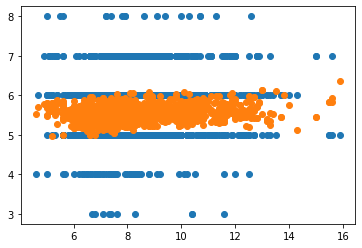

In [63]:
plt.scatter(dataframe["fixed acidity"], dataframe["quality"])
plt.scatter(dataframe["fixed acidity"], model.predict(X))

## 2.a) Defining the traditional tensorflow model

In [69]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
model_2.fit(X, Y, epochs=200, verbose=0) 

In [70]:
model_2.evaluate(X, Y)

50/50 [==============================] - 0s 2ms/step - loss: 0.4977 - mae: 0.4977


[0.49765509366989136, 0.49765509366989136]

## 2.b) Visualizing the result of the model

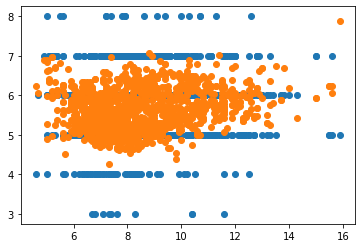

In [72]:
plt.scatter(dataframe["fixed acidity"], dataframe["quality"])
plt.scatter(dataframe["fixed acidity"], model_2.predict(X))

#### Conclusion: Depending upon the needs we can either use the model1 or the model2, but it is clearly evident that the loss of the model2 has less loss as compared to that of the model1